In [2]:
import supervision as sv
from ultralytics import YOLO
from tqdm import tqdm

In [ ]:
SOURCE_VIDEO_PATH = "../data/raw/Camera.mp4"

PERSON_DETECTION_MODEL = YOLO("../models/yolo11n.pt")
PERSON_ID = 0

In [ ]:
results = PERSON_DETECTION_MODEL.track(
    SOURCE_VIDEO_PATH, 
    show=True, conf=0.3, tracker="botsort.yaml", 
    persist=True, #stream=True
)

for r in results:
    print(r)
    break

NameError: name 'PERSON_DETECTION_MODEL' is not defined

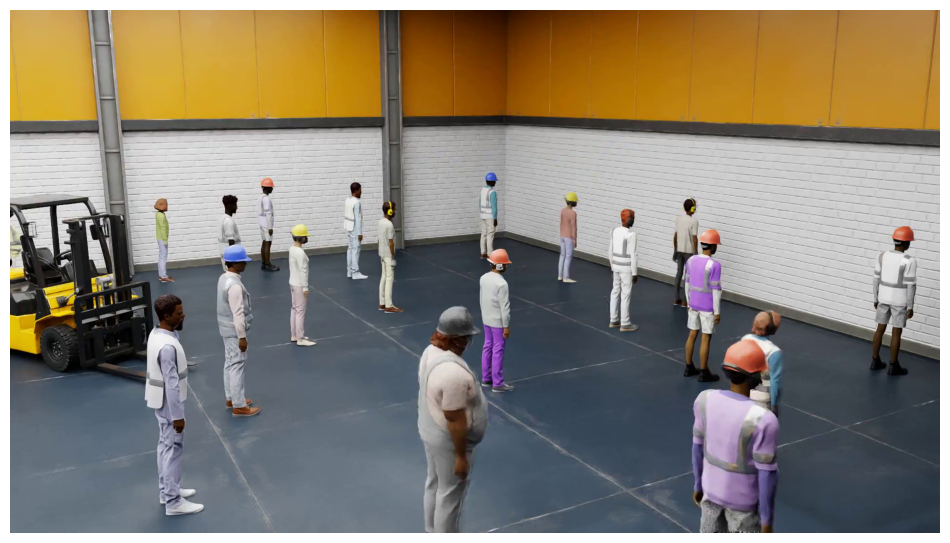

In [ ]:
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

sv.plot_image(frame)

In [ ]:
# box_annotator = sv.BoxAnnotator(
#     color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
#     thickness=2
# )
# label_annotator = sv.LabelAnnotator(
#     color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
#     text_color=sv.Color.from_hex('#000000')
# )

# frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
# frame = next(frame_generator)

# result = PERSON_DETECTION_MODEL(frame, task="detect", mode="predict", conf=0.3)[0]
# detections = sv.Detections.from_ultralytics(result)

# labels = [
#     f"{class_name} {confidence:.2f}"
#     for class_name, confidence
#     in zip(detections['class_name'], detections.confidence)
# ]

# annotated_frame = frame.copy()
# annotated_frame = box_annotator.annotate(
#     scene=annotated_frame,
#     detections=detections)
# annotated_frame = label_annotator.annotate(
#     scene=annotated_frame,
#     detections=detections,
#     labels=labels)

# sv.plot_image(annotated_frame)

  0%|          | 0/9000 [00:00<?, ?it/s]

[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


0: 384x640 18 persons, 1 truck, 302.0ms
Speed: 5.2ms preprocess, 302.0ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


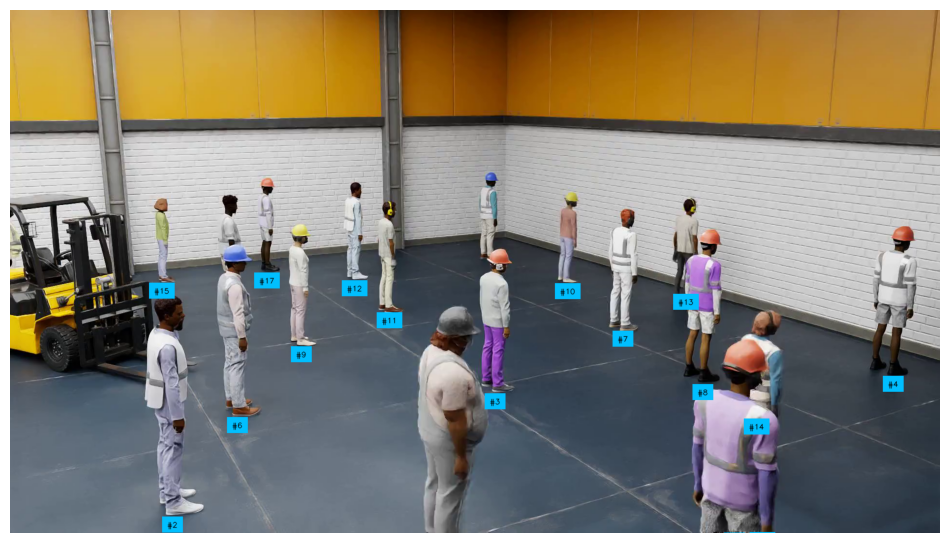

  0%|          | 0/9000 [00:01<?, ?it/s]


In [ ]:
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)

tracker = sv.ByteTrack()
tracker.reset()

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
# frame = next(frame_generator)

for frame in tqdm(frame_generator, total=video_info.total_frames):
    result = PERSON_DETECTION_MODEL(frame, task="detect", mode="predict", conf=0.3)[0]
    detections = sv.Detections.from_ultralytics(result)

    all_detections = detections[detections.class_id == PERSON_ID]
    all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
    # all_detections.class_id -= 1
    all_detections = tracker.update_with_detections(detections=all_detections)

    labels = [
        f"#{tracker_id}"
        for tracker_id
        in all_detections.tracker_id
    ]

    annotated_frame = frame.copy()
    annotated_frame = label_annotator.annotate(
        scene=annotated_frame,
        detections=all_detections,
        labels=labels
    )

    sv.plot_image(annotated_frame)
    break